@file task3.ipynb<br>
@author Kevin Hsieh<br>
@PeopleSoftID 2078611<br>
@professor Dr. Eick<br>
@brief COSC4368 - Problem Set 2 Task 3<br>
@version 1<br>
@date 2022-03-21<br>
@copyright Copyright (c) 2022<br>

The goal of this task is to apply different classification approaches to a challenging dataset. <br>
Compare the results and enhance the accuracy of the learnt models via selecting better parameters/preprocessing/kernels/background <br>
knowledge to summarize my findings in a report. This is a multiclass classification problem, which is to create classification models <br>
that distinguish the relation between a student’s life attributes and their grades.<br>

Source: https://archive.ics.uci.edu/ml/datasets/Higher+Education+Students+Performance+Evaluation+Dataset# <br>

Data Set Information: <br>

1-10 of the data are the personal questions, 11-16. questions include family questions, and the remaining questions include education habits.<br>


Attribute Information:<br>

Student ID<br>
1- Student Age (1: 18-21, 2: 22-25, 3: above 26)<br>
2- Sex (1: female, 2: male)<br>
3- Graduated high-school type: (1: private, 2: state, 3: other)<br>
4- Scholarship type: (1: None, 2: 25%, 3: 50%, 4: 75%, 5: Full)<br>
5- Additional work: (1: Yes, 2: No)<br>
6- Regular artistic or sports activity: (1: Yes, 2: No)<br>
7- Do you have a partner: (1: Yes, 2: No)<br>
8- Total salary if available (1: USD 135-200, 2: USD 201-270, 3: USD 271-340, 4: USD 341-410, 5: above 410)<br>
9- Transportation to the university: (1: Bus, 2: Private car/taxi, 3: bicycle, 4: Other)<br>
10- Accommodation type in Cyprus: (1: rental, 2: dormitory, 3: with family, 4: Other)<br>
11- Mother's education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)<br>
12- Father's education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)<br>
13- Number of sisters/brothers (if available): (1: 1, 2:, 2, 3: 3, 4: 4, 5: 5 or above)<br>
14- Parental status: (1: married, 2: divorced, 3: died - one of them or both)<br>
15- Mother's occupation: (1: retired, 2: housewife, 3: government officer, 4: private sector employee, 5: self-employment, 6: other)<br>
16- Father's occupation: (1: retired, 2: government officer, 3: private sector employee, 4: self-employment, 5: other)<br>
17- Weekly study hours: (1: None, 2: <5 hours, 3: 6-10 hours, 4: 11-20 hours, 5: more than 20 hours)<br>
18- Reading frequency (non-scientific books/journals): (1: None, 2: Sometimes, 3: Often)<br>
19- Reading frequency (scientific books/journals): (1: None, 2: Sometimes, 3: Often)<br>
20- Attendance to the seminars/conferences related to the department: (1: Yes, 2: No)<br>
21- Impact of your projects/activities on your success: (1: positive, 2: negative, 3: neutral)<br>
22- Attendance to classes (1: always, 2: sometimes, 3: never)<br>
23- Preparation to midterm exams 1: (1: alone, 2: with friends, 3: not applicable)<br>
24- Preparation to midterm exams 2: (1: closest date to the exam, 2: regularly during the semester, 3: never)<br>
25- Taking notes in classes: (1: never, 2: sometimes, 3: always)<br>
26- Listening in classes: (1: never, 2: sometimes, 3: always)<br>
27- Discussion improves my interest and success in the course: (1: never, 2: sometimes, 3: always)<br>
28- Flip-classroom: (1: not useful, 2: useful, 3: not applicable)<br>
29- Cumulative grade point average in the last semester (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)<br>
30- Expected Cumulative grade point average in the graduation (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)<br>
31- Course ID<br>
32- OUTPUT Grade (0: Fail, 1: DD, 2: DC, 3: CC, 4: CB, 5: BB, 6: BA, 7: AA)<br>

In [1]:
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate, KFold,cross_val_predict,train_test_split, cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("DATA.csv",sep=";")

In [3]:
df.head()

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   STUDENT ID  145 non-null    object
 1   1           145 non-null    int64 
 2   2           145 non-null    int64 
 3   3           145 non-null    int64 
 4   4           145 non-null    int64 
 5   5           145 non-null    int64 
 6   6           145 non-null    int64 
 7   7           145 non-null    int64 
 8   8           145 non-null    int64 
 9   9           145 non-null    int64 
 10  10          145 non-null    int64 
 11  11          145 non-null    int64 
 12  12          145 non-null    int64 
 13  13          145 non-null    int64 
 14  14          145 non-null    int64 
 15  15          145 non-null    int64 
 16  16          145 non-null    int64 
 17  17          145 non-null    int64 
 18  18          145 non-null    int64 
 19  19          145 non-null    int64 
 20  20        

In [5]:
df.describe().T.style.background_gradient(cmap = "Oranges")

,count,mean,std,min,25%,50%,75%,max
1,145.000000,1.620690,0.613154,1.000000,1.000000,2.000000,2.000000,3.000000
2,145.000000,1.600000,0.491596,1.000000,1.000000,2.000000,2.000000,2.000000
3,145.000000,1.944828,0.537216,1.000000,2.000000,2.000000,2.000000,3.000000
4,145.000000,3.572414,0.805750,1.000000,3.000000,3.000000,4.000000,5.000000
5,145.000000,1.662069,0.474644,1.000000,1.000000,2.000000,2.000000,2.000000
6,145.000000,1.600000,0.491596,1.000000,1.000000,2.000000,2.000000,2.000000
7,145.000000,1.579310,0.495381,1.000000,1.000000,2.000000,2.000000,2.000000
8,145.000000,1.627586,1.020245,1.000000,1.000000,1.000000,2.000000,5.000000
9,145.000000,1.620690,1.061112,1.000000,1.000000,1.000000,2.000000,4.000000
10,145.000000,1.731034,0.783999,1.000000,1.000000,2.000000,2.000000,4.000000


In [6]:
df.isnull().sum()

STUDENT ID    0
1             0
2             0
3             0
4             0
5             0
6             0
7             0
8             0
9             0
10            0
11            0
12            0
13            0
14            0
15            0
16            0
17            0
18            0
19            0
20            0
21            0
22            0
23            0
24            0
25            0
26            0
27            0
28            0
29            0
30            0
COURSE ID     0
GRADE         0
dtype: int64

Text(0.5, 1.0, 'Correlation Heatmap')

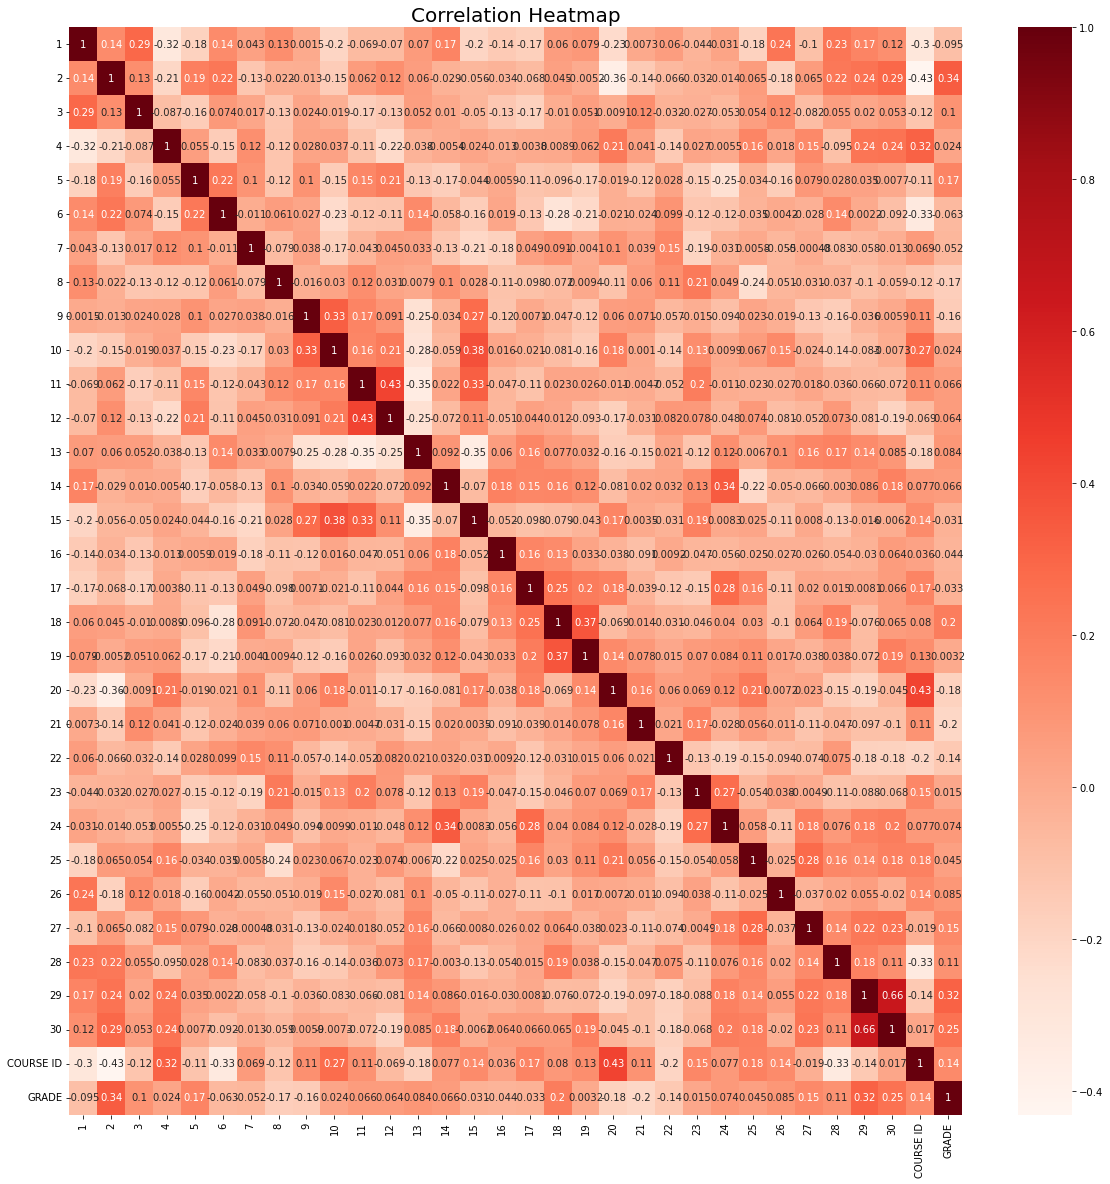

In [7]:
#describing correlation
corr=df.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

In [8]:
df["COURSE ID"].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
#check duplicate
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE


In [10]:
count = df.groupby(['GRADE']).count()
count

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,COURSE ID
GRADE,,,,,,,,,,,,,,,,,,,,,
0,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
1,35,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
2,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
3,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
4,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
5,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
6,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
7,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17


/home/kevin/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


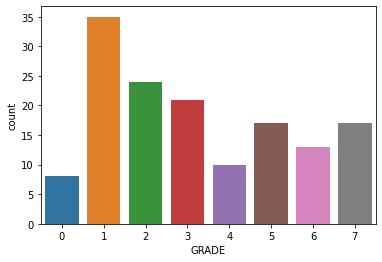

In [11]:
sns.countplot(df['GRADE'],label="Count")
plt.show()

In [12]:
X= df.drop(['GRADE','STUDENT ID'],axis=1)
y= df['GRADE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
linear_svc = svm.SVC(kernel='linear',random_state=42).fit(X_train,y_train)
rbf_svc = svm.SVC(kernel='rbf',random_state=42).fit(X_train,y_train)
relu_MLP = MLPClassifier(activation='relu',max_iter=3000,random_state=42).fit(X_train,y_train)
tanh_MLP = MLPClassifier(activation='tanh',max_iter=3000,random_state=42).fit(X_train,y_train)

In [14]:
linear_cv = cross_validate(linear_svc,X_test,y=y_test,cv=KFold(n_splits=10))
rbf_cv = cross_validate(rbf_svc,X_test,y=y_test,cv=KFold(n_splits=10))
relu_cv = cross_validate(relu_MLP,X_test,y=y_test,cv=KFold(n_splits=10))
tanh_cv = cross_validate(tanh_MLP,X_test,y=y_test,cv=KFold(n_splits=10))

In [15]:
linear_y_pred = cross_val_predict(linear_svc,X_test,y=y_test,cv=KFold(n_splits=10))
rbf_y_pred = cross_val_predict(rbf_svc,X_test,y=y_test,cv=KFold(n_splits=10))
relu_y_pred = cross_val_predict(relu_MLP,X_test,y=y_test,cv=KFold(n_splits=10))
tanh_y_pred = cross_val_predict(tanh_MLP,X_test,y=y_test,cv=KFold(n_splits=10))

In [16]:
linear_y_scores = cross_val_score(linear_svc,X_test,y=y_test,cv=KFold(n_splits=10))
rbf_y_scores = cross_val_score(rbf_svc,X_test,y=y_test,cv=KFold(n_splits=10))
relu_y_scores = cross_val_score(relu_MLP,X_test,y=y_test,cv=KFold(n_splits=10))
tanh_y_scores = cross_val_score(tanh_MLP,X_test,y=y_test,cv=KFold(n_splits=10))

In [17]:
print('Linear Accuracy: %.3f (%.3f)' % (np.mean(linear_y_scores), np.std(linear_y_scores)))
print('RBF Accuracy: %.3f (%.3f)' % (np.mean(rbf_y_scores), np.std(rbf_y_scores)))
print('Relu Accuracy: %.3f (%.3f)' % (np.mean(relu_y_scores), np.std(relu_y_scores)))
print('Tanh Accuracy: %.3f (%.3f)' % (np.mean(tanh_y_scores), np.std(tanh_y_scores)))

Linear Accuracy: 0.170 (0.158)
RBF Accuracy: 0.215 (0.252)
Relu Accuracy: 0.145 (0.227)
Tanh Accuracy: 0.100 (0.166)


In [18]:
linear_report = classification_report(y_test,linear_y_pred)
rbf_report = classification_report(y_test,rbf_y_pred)
relu_report = classification_report(y_test,relu_y_pred)
tanh_report = classification_report(y_test,tanh_y_pred)

/home/kevin/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kevin/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kevin/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kevin/anaconda3/lib/python3.

In [19]:
from sklearn import metrics

print('\nLinear Kernel')
print('accuracy:',int(100*np.mean(linear_cv['test_score'])),'%')
print(linear_report)

print('\nRBF Kernel')
print('accuracy:',int(100*np.mean(rbf_cv['test_score'])),'%')
print(rbf_report)



Linear Kernel
accuracy: 17 %
              precision    recall  f1-score   support

           0       0.14      0.20      0.17         5
           1       0.25      0.30      0.27        10
           2       0.25      0.22      0.24         9
           3       0.17      0.17      0.17         6
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         3

    accuracy                           0.16        44
   macro avg       0.10      0.11      0.11        44
weighted avg       0.15      0.16      0.15        44


RBF Kernel
accuracy: 21 %
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.23      0.70      0.34        10
           2       0.15      0.22      0.18         9
           3       0.00      0.00      0.00         6
           4       0.

In [20]:
print('\nRelu MLP')
print('accuracy:',int(100*np.mean(relu_cv['test_score'])),'%')
print(relu_report)

print('\nTanh MLP')
print('accuracy:',int(100*np.mean(tanh_cv['test_score'])),'%')
print(tanh_report)


Relu MLP
accuracy: 14 %
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.25      0.20      0.22        10
           2       0.17      0.22      0.19         9
           3       0.20      0.17      0.18         6
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.20      0.20      0.20         5
           7       0.00      0.00      0.00         3

    accuracy                           0.14        44
   macro avg       0.10      0.10      0.10        44
weighted avg       0.14      0.14      0.14        44


Tanh MLP
accuracy: 10 %
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.18      0.20      0.19        10
           2       0.18      0.22      0.20         9
           3       0.00      0.00      0.00         6
           4       0.00     

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['linear']}
grid = GridSearchCV(svm.SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.333 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.300 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.200 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.300 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.400 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.333 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.300 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.200 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.300 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.400 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.333 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

/home/kevin/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[CV 3/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.250 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.250 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.300 total time=   0.0s
[CV 1/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.333 total time=   0.0s
[CV 2/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.300 total time=   0.0s
[CV 3/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.250 total time=   0.0s
[CV 4/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.250 total time=   0.0s
[CV 5/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.300 total time=   0.0s
[CV 1/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.333 total time=   0.0s
[CV 2/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.300 total time=   0.0s
[CV 3/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.250 total time=   0.0s
[CV 4/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.250 total time=   0.0s
[CV 5/5] END ...C=1, gamma=0

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [22]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [23]:
linear_grid_pred = grid.predict(X_test)
print("Linear Kernel with parameters")
print(classification_report(y_test,linear_grid_pred))

Linear Kernel with parameters
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.16      0.30      0.21        10
           2       0.14      0.11      0.12         9
           3       0.75      0.50      0.60         6
           4       0.00      0.00      0.00         3
           5       0.20      0.33      0.25         3
           6       1.00      0.20      0.33         5
           7       0.00      0.00      0.00         3

    accuracy                           0.20        44
   macro avg       0.28      0.18      0.19        44
weighted avg       0.29      0.20      0.21        44



/home/kevin/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kevin/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kevin/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
param_grid = {'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf']}
grid = GridSearchCV(svm.SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.238 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.250 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.250 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.250 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.250 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.238 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.250 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.250 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.250 total time=   0.0s


/home/kevin/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.250 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.238 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.250 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.250 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.250 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.250 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.238 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.250 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.250 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.250 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.250 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.238 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [25]:
grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [26]:
rbf_grid_pred = grid.predict(X_test)
print("RBF Kernel with parameters")
print(classification_report(y_test,rbf_grid_pred))

RBF Kernel with parameters
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.22      0.40      0.29        10
           2       0.20      0.11      0.14         9
           3       0.50      0.33      0.40         6
           4       0.00      0.00      0.00         3
           5       0.12      0.33      0.18         3
           6       0.00      0.00      0.00         5
           7       0.40      0.67      0.50         3

    accuracy                           0.23        44
   macro avg       0.18      0.23      0.19        44
weighted avg       0.20      0.23      0.20        44



/home/kevin/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kevin/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kevin/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
new_relu_mlp = MLPClassifier(max_iter=3000,random_state=42)
relu_parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [28]:
new_tanh_mlp = MLPClassifier(max_iter=3000,random_state=42)
tanh_parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [29]:
relu_clf = GridSearchCV(new_relu_mlp, relu_parameter_space, n_jobs=-1, cv=10)
relu_clf.fit(X_train, y_train)

/home/kevin/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/home/kevin/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kevin/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kevin/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kevin/anaconda3/lib/python3

GridSearchCV(cv=10, estimator=MLPClassifier(max_iter=3000, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['relu'], 'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [30]:
tanh_clf = GridSearchCV(new_tanh_mlp, tanh_parameter_space, n_jobs=-1, cv=10)
tanh_clf.fit(X_train, y_train)

/home/kevin/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/home/kevin/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kevin/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kevin/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kevin/anaconda3/lib/python3

GridSearchCV(cv=10, estimator=MLPClassifier(max_iter=3000, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['tanh'], 'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [35]:
# Best parameter set
print('Best parameters found:\n', relu_clf.best_params_)

relu_grid_pred = relu_clf.predict(X_test)
print(classification_report(y_test,relu_grid_pred))

Best parameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'sgd'}
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.12      0.20      0.15        10
           2       0.14      0.11      0.12         9
           3       0.57      0.67      0.62         6
           4       0.00      0.00      0.00         3
           5       0.17      0.33      0.22         3
           6       1.00      0.20      0.33         5
           7       0.20      0.33      0.25         3

    accuracy                           0.23        44
   macro avg       0.27      0.23      0.21        44
weighted avg       0.27      0.23      0.21        44



/home/kevin/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kevin/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kevin/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
# Best parameter set
print('Best parameters found:\n', tanh_clf.best_params_)

tanh_grid_pred = tanh_clf.predict(X_test)
print(classification_report(y_test,tanh_grid_pred))

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.29      0.50      0.37        10
           2       0.33      0.22      0.27         9
           3       0.40      0.33      0.36         6
           4       0.00      0.00      0.00         3
           5       0.14      0.33      0.20         3
           6       1.00      0.20      0.33         5
           7       0.17      0.33      0.22         3

    accuracy                           0.27        44
   macro avg       0.29      0.24      0.22        44
weighted avg       0.32      0.27      0.25        44



/home/kevin/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kevin/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kevin/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
from sklearn.metrics import mean_absolute_error

print("linear SVC MAE testing score: ", mean_absolute_error(y_test, linear_y_pred))
print("rbf SVC MAE testing score: ", mean_absolute_error(y_test, rbf_y_pred))
print("relu MLP MAE testing score: ", mean_absolute_error(y_test, relu_y_pred))
print("tanh MLP MAE testing score: ", mean_absolute_error(y_test, tanh_y_pred))
print("\n")
print("improved linear SVC MAE testing score: ", mean_absolute_error(y_test, linear_grid_pred))
print("improved rbf SVC MAE testing score: ", mean_absolute_error(y_test, rbf_grid_pred))
print("improved relu MLP MAE testing score: ", mean_absolute_error(y_test, relu_grid_pred))
print("improved tanh MLP MAE testing score: ", mean_absolute_error(y_test, tanh_grid_pred))

linear SVC MAE testing score:  1.8863636363636365
rbf SVC MAE testing score:  1.9772727272727273
relu MLP MAE testing score:  1.9090909090909092
tanh MLP MAE testing score:  1.8863636363636365


improved linear SVC MAE testing score:  1.7727272727272727
improved rbf SVC MAE testing score:  1.6136363636363635
improved relu MLP MAE testing score:  1.6590909090909092
improved tanh MLP MAE testing score:  1.75
